In [1]:
#importing imp libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Avocado/avocado.csv.zip'
data = pd.read_csv(url, compression='zip')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Data preprocessing for classification task
data['type'] = pd.factorize(data['type'])[0]

In [5]:
# Splitting data for classification
X_cls = data[['AveragePrice', 'Total Volume', '4046', '4225', '4770']]
y_cls = data['type']
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [6]:
# Training a Random Forest Classifier for classification task
clf = RandomForestClassifier(random_state=42)
clf.fit(X_cls_train, y_cls_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predictions and evaluation for classification task
y_cls_pred = clf.predict(X_cls_test)
print("\nClassification Report:")
print(classification_report(y_cls_test, y_cls_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1820
           1       0.99      0.98      0.99      1830

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650



In [8]:
# Data preprocessing for regression task
X_reg = data[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'year']]
y_reg = data['Total Volume']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [9]:
# Training a Linear Regression model for regression task
reg = LinearRegression()
reg.fit(X_reg_train, y_reg_train)

LinearRegression()

In [10]:
# Predictions and evaluation for regression task
y_reg_pred = reg.predict(X_reg_test)
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)
print("\nRegression Performance:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Regression Performance:
Mean Squared Error: 9.480427009547245e-18
R-squared: 1.0


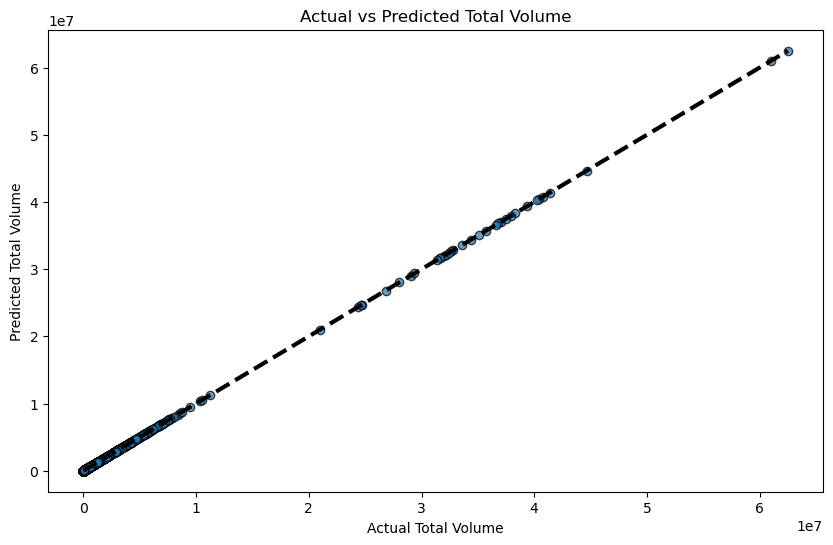

In [11]:
# Plotting results for regression task
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred, edgecolor='k', alpha=0.7)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'k--', lw=3)
plt.xlabel('Actual Total Volume')
plt.ylabel('Predicted Total Volume')
plt.title('Actual vs Predicted Total Volume')
plt.show()